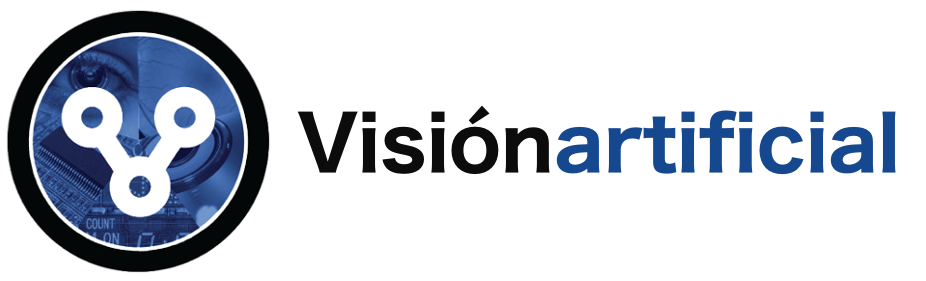

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Que é un "Blob"?</font>

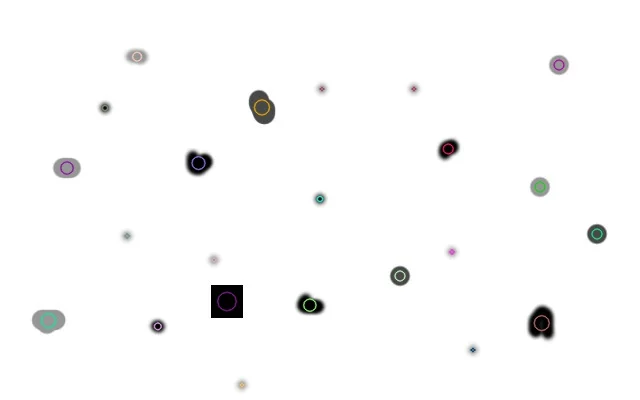

Un "Blob" é un grupo de píxeles conectados nunha imaxe que comparten algunha propiedade común (por exemplo, valor en escala de grises). Na imaxe superior, as rexións escuras conectadas son blobs e o obxectivo é identificalas e marcalas.
 

## <font style="color:rgb(50,120,229)">Exemplo dun simple detector de Blobs</font>
OpenCV ofrece un xeito cómodo de detectar blobs e filtralos en función de **diferentes características**. Comecemos co exemplo máis simple.

In [1]:
# Importacions estandar
import cv2
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Detectemos os blobs da imaxe dada e visualizámolos.

Neste exemplo, atopamos a posición (coordenadas x, y) do blob e o radio. 

In [3]:
# Lemos a imaxe
im = cv2.imread("../data/blob_detection.jpg", cv2.IMREAD_GRAYSCALE)
if im is None:
    print("Imaxe non atopada")
 
# Instanciamos o obxecto cos valores por defecto.
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(im)

im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
 
# Marcamos os blobs mediane anotación na imaxe
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Marcamos o centro en negro
    cv2.circle(im,(x,y),5,(0,0,0),-1)
    # Radio do blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Marcamos o blob en vermello
    cv2.circle(im,(x,y),radius,(0,0,255),2)

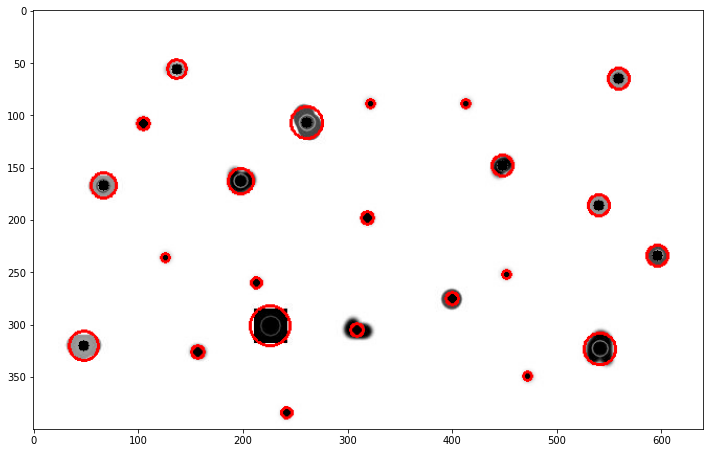

In [4]:
# Visualicemos os resultados
plt.imshow(im[:,:,::-1]);

# <font style="color:rgb(50,120,229)">Como funciona a detección de blobs?</font>

SimpleBlobDetector, como o nome indica, está baseado nun algoritmo bastante sinxelo que se describe a continuación. O algoritmo está controlado por parámetros (que se amosan en negriña a continuación) e ten os seguintes pasos. 

1. **Thresholding** : Converte a imaxe de entrada en varias imaxes binarias con distintos limiares a partir de minThreshold. Estes limiares increméntanse en thresholdStep ata maxThreshold. Así, o primeiro limiar é minThreshold, o segundo é minThreshold + limiarStep, o terceiro é minThreshold + 2 x limiarStep, etc.
2. **Grouping** : En cada imaxe binaria, os píxeles brancos conectados agrúpanse. Chamámolos blob binarios.
3. **Merging**  : Compútanse os centros dos blobs de cada imaxe binaria e combínanse os situados a unha distancia menos que minDistBetweenBlobs.
4. **Center & Radius Calculation** :  os centros e os radios dos novos blobs fusionados calcúlanse e retornase os seus valores.

# <font style="color:rgb(50,120,229)">Filtrando Blobs por cor, tamaño e forma</font>


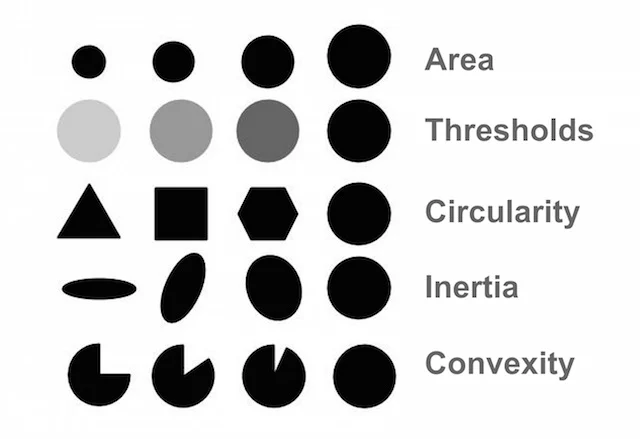



Os parámetros de SimpleBlobDetector poden ser configurados para detectar o tipo de blob que queremos.

- **By Color** : O primeiro é asignar filterByColor = 1. Asigna blobColor = 0 para seleccionar blobs escuros e  blobColor = 255 para os claros. 
- **By Size** : Pode filtrar os blobs en función do tamaño configurando os parámetros filterByArea = 1 e os valores apropiados para minArea e maxArea. Ex. configurar minArea = 100 filtrará todos os blobs que teñan menos de 100 píxeles. 
- **By Shape** : A forma ten tres parámetros diferentes.
- **Circularity** : Isto só mide o parecido dun blob cun círculo. Ex. un hexágono regular ten maior circularidade ca un cadrado. Para filtrar por circularidade, configura filterByCircularity = 1 e os valores apropiados para minCircularity e maxCircularity. 

 
 $$\text{Circularidade} = \frac{4\pi\times \text{Area}}
{(\text{perimetro})^2}$$

    Isto significa que un círculo ten unha circularidade de 1, e a dun cadrado é 0,785, etc.

- **Convexity** : Unha imaxe vale máis que mil palabras. A convexidade defínese como (Área do blob / Área do seu convex hull). O convex hull dunha forma é a forma convexa máis axustada que pecha completamente a forma. Para filtrar por convexidade, configura filterByConvexity = 1, seguido de 0 ≤ minConvexity ≤ 1 e maxConvexity ( ≤ 1) 
- **Inertia Ratio** : Non deixes que isto te asuste. Os matemáticos adoitan empregar palabras confusas para describir algo moi sinxelo. Todo o que tes que saber é que isto mide o alargada que é unha forma. Ex. para un círculo, este valor é 1, para unha elipse está entre 0 e 1 e para unha liña é 0. Para filtrar polo produto de inercia, establece filterByInertia = 1 e configure 0 ≤ minInertiaRatio ≤ 1 e maxInertiaRatio (≤ 1 ) apropiadamente.

![](../data/images/Convexity.png)

![](../data/images/BlobTest.jpg)

# <font style="color:rgb(50,120,229)">Como configurar os parámetros de SimpleBlobDetector en OpenCV?</font>

A configuración de parámetros para SimpleBlobDetector é sinxela. Aquí tes un exemplo.

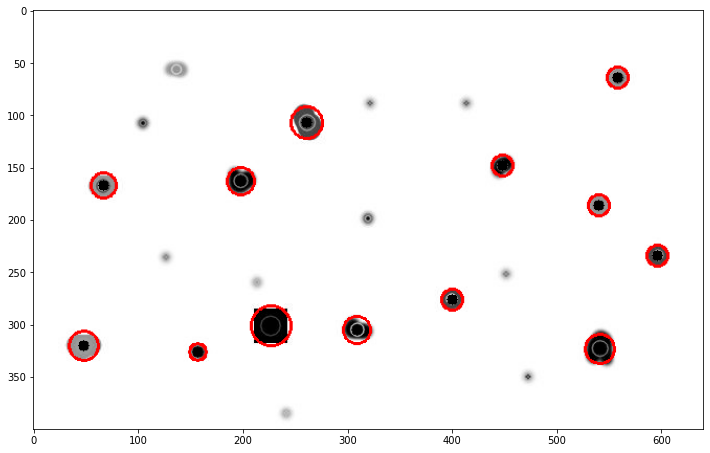

In [5]:
# Asignamos os parámetro de SimpleBlobDetector.
params = cv2.SimpleBlobDetector_Params()
 
# Cambiamos os limiares
params.minThreshold = 10
params.maxThreshold = 200
 
# Filtramos por Area.
params.filterByArea = True
params.minArea = 150
 
# Filtramos por Circularidade
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filtramos por convexidade
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filtramos por Inercia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Creamos un detector con estes parametro
detector = cv2.SimpleBlobDetector_create(params)

#lemos a imaxe
im = cv2.imread("../data/blob_detection.jpg", cv2.IMREAD_GRAYSCALE)
if im is None:
    print("Imaxe non atopada")

keypoints = detector.detect(im)

im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
 
# Marcamos os blobs mediane anotación na imaxe
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Marcamos o centro en negro
    cv2.circle(im,(x,y),5,(0,0,0),-1)
    # Radio do blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Marcamos o blob en vermello
    cv2.circle(im,(x,y),radius,(0,0,255),2)
    
    
# Visualicemos os resultados
plt.imshow(im[:,:,::-1]);

Xoga con estes parámetros para ver como cambia a saída.